In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
from sklearn.preprocessing import LabelEncoder

lec = LabelEncoder()

df['species'] = lec.fit_transform(df['species'])

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df['species'].unique()

array([0, 1, 2])

In [8]:
df = df[df['species']!=0][['sepal_width','petal_length','species']]

In [9]:
df.shape

(100, 3)

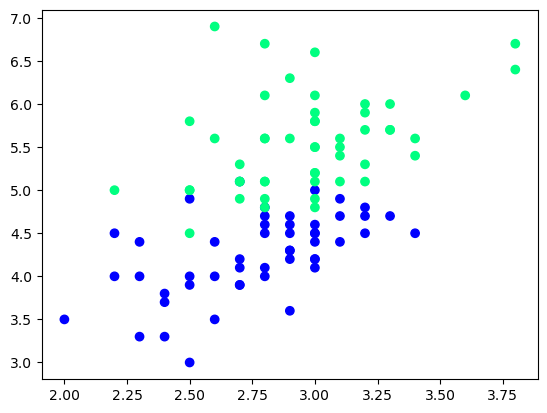

In [10]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')
plt.show()

In [11]:
#Taking only 10 rows for training

df = df.sample(100)

df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [12]:
df_train

,sepal_width,petal_length,species
94,2.7,4.2,1
97,2.9,4.3,1
80,2.4,3.8,1
86,3.1,4.7,1
91,3.0,4.6,1
122,2.8,6.7,2
59,2.7,3.9,1
106,2.5,4.5,2
64,2.9,3.6,1
79,2.6,3.5,1


In [13]:
df_val

,sepal_width,petal_length,species
74,2.9,4.3,1
111,2.7,5.3,2
70,3.2,4.8,1
95,3.0,4.2,1
73,2.8,4.7,1


In [14]:
df_test

,sepal_width,petal_length,species
125,3.2,6.0,2
60,2.0,3.5,1
123,2.7,4.9,2
62,2.2,4.0,1
69,2.5,3.9,1


In [15]:
X_test = df_val.iloc[:,0:2]
y_test = df_val.iloc[:,-1]

# Case 1 - Bagging

In [16]:
#data for tree-1

df_bag = df.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
84,3.0,4.5,1
58,2.9,4.6,1
114,2.8,5.1,2
53,2.3,4.0,1
144,3.3,5.7,2
53,2.3,4.0,1
143,3.2,5.9,2
128,2.8,5.6,2


In [17]:
!pip install mlxtend

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [19]:
dtc_bag1 = DecisionTreeClassifier()

In [20]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

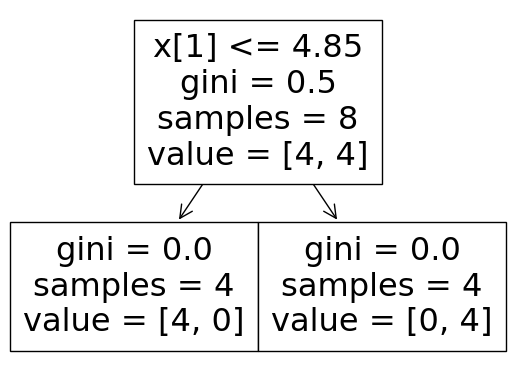

C:\Users\HP\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


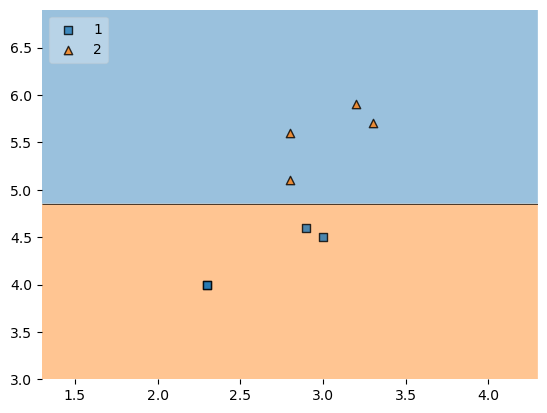

In [21]:
evaluate(dtc_bag1,X,y)

In [22]:
#data for tree-2

df_bag1 = df.sample(8,replace=True)

X = df_bag1.iloc[:,0:2]
y = df_bag1.iloc[:,-1]

df_bag1

,sepal_width,petal_length,species
67,2.7,4.1,1
96,2.9,4.2,1
149,3.0,5.1,2
146,2.5,5.0,2
131,3.8,6.4,2
148,3.4,5.4,2
144,3.3,5.7,2
148,3.4,5.4,2


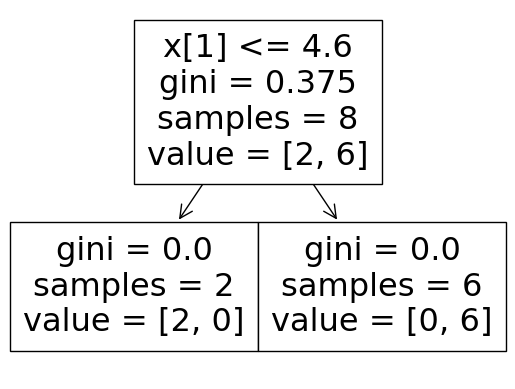

C:\Users\HP\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


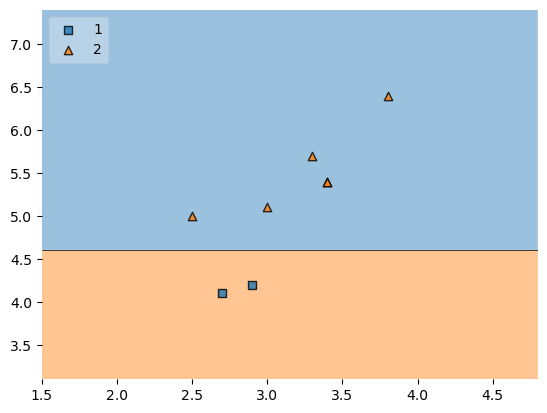

In [23]:
dtc_bag2 = DecisionTreeClassifier()
evaluate(dtc_bag2,X,y)

In [24]:
#data for tree-3

df_bag3 = df.sample(8,replace=True)

X = df_bag3.iloc[:,0:2]
y = df_bag3.iloc[:,-1]

df_bag3

,sepal_width,petal_length,species
82,2.7,3.9,1
117,3.8,6.7,2
128,2.8,5.6,2
137,3.1,5.5,2
95,3.0,4.2,1
90,2.6,4.4,1
69,2.5,3.9,1
120,3.2,5.7,2


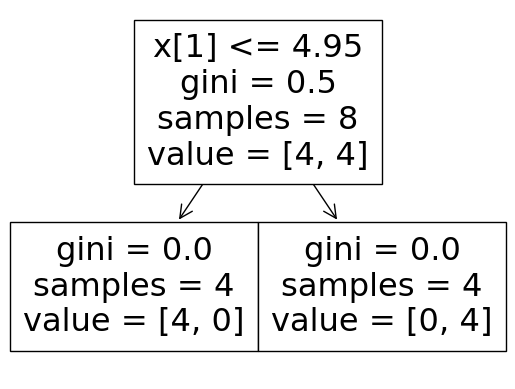

C:\Users\HP\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


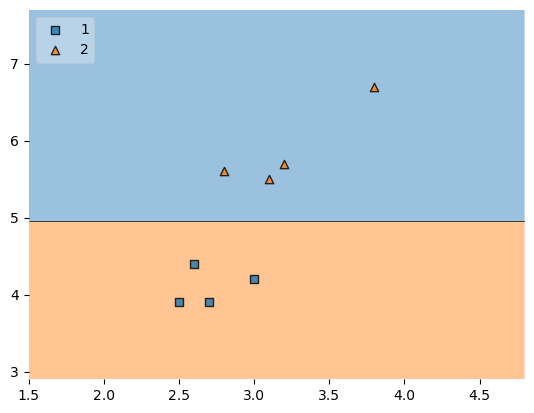

In [25]:
dtc_bag3 = DecisionTreeClassifier()
evaluate(dtc_bag3,X,y)

# Predict

In [26]:
df_test

,sepal_width,petal_length,species
125,3.2,6.0,2
60,2.0,3.5,1
123,2.7,4.9,2
62,2.2,4.0,1
69,2.5,3.9,1


In [27]:
print("Predictor 1",dtc_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dtc_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dtc_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\HP\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

Row sampling without replacement

In [28]:
df_train

,sepal_width,petal_length,species
94,2.7,4.2,1
97,2.9,4.3,1
80,2.4,3.8,1
86,3.1,4.7,1
91,3.0,4.6,1
122,2.8,6.7,2
59,2.7,3.9,1
106,2.5,4.5,2
64,2.9,3.6,1
79,2.6,3.5,1


In [30]:
#replace : default=False

df_train.sample(8)

,sepal_width,petal_length,species
64,2.9,3.6,1
59,2.7,3.9,1
79,2.6,3.5,1
122,2.8,6.7,2
80,2.4,3.8,1
94,2.7,4.2,1
86,3.1,4.7,1
97,2.9,4.3,1


# Random Subspaces

Column sampling

In [31]:
df1 = pd.read_csv('iris.csv')

In [32]:
df1 = df1.sample(10)

In [33]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.3,5.7,2.5,virginica
2,4.7,3.2,1.3,0.2,setosa
139,6.9,3.1,5.4,2.1,virginica
64,5.6,2.9,3.6,1.3,versicolor
111,6.4,2.7,5.3,1.9,virginica
125,7.2,3.2,6.0,1.8,virginica
9,4.9,3.1,1.5,0.1,setosa
133,6.3,2.8,5.1,1.5,virginica
35,5.0,3.2,1.2,0.2,setosa
68,6.2,2.2,4.5,1.5,versicolor


In [37]:
df1.sample(2,replace=True,axis=1)

,petal_length,sepal_width
144,5.7,3.3
2,1.3,3.2
139,5.4,3.1
64,3.6,2.9
111,5.3,2.7
125,6.0,3.2
9,1.5,3.1
133,5.1,2.8
35,1.2,3.2
68,4.5,2.2


In [38]:
df1.sample(2,replace=False,axis=1)

,species,petal_width
144,virginica,2.5
2,setosa,0.2
139,virginica,2.1
64,versicolor,1.3
111,virginica,1.9
125,virginica,1.8
9,setosa,0.1
133,virginica,1.5
35,setosa,0.2
68,versicolor,1.5


# Random Patches

Row sampling + Column sampling

In [39]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.3,5.7,2.5,virginica
2,4.7,3.2,1.3,0.2,setosa
139,6.9,3.1,5.4,2.1,virginica
64,5.6,2.9,3.6,1.3,versicolor
111,6.4,2.7,5.3,1.9,virginica
125,7.2,3.2,6.0,1.8,virginica
9,4.9,3.1,1.5,0.1,setosa
133,6.3,2.8,5.1,1.5,virginica
35,5.0,3.2,1.2,0.2,setosa
68,6.2,2.2,4.5,1.5,versicolor


In [41]:
df1.sample(8,replace=True).sample(3,replace=True,axis=1)

,petal_width,sepal_width,species
9,0.1,3.1,setosa
111,1.9,2.7,virginica
68,1.5,2.2,versicolor
144,2.5,3.3,virginica
111,1.9,2.7,virginica
111,1.9,2.7,virginica
64,1.3,2.9,versicolor
139,2.1,3.1,virginica
